In [1]:
from __future__ import absolute_import, division, print_function

# Daily rides

## Imports

In [2]:
import datetime
import os

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines

%matplotlib inline

### Data

In [3]:
data_dir = os.path.join(os.getcwd(),'..','..','data')

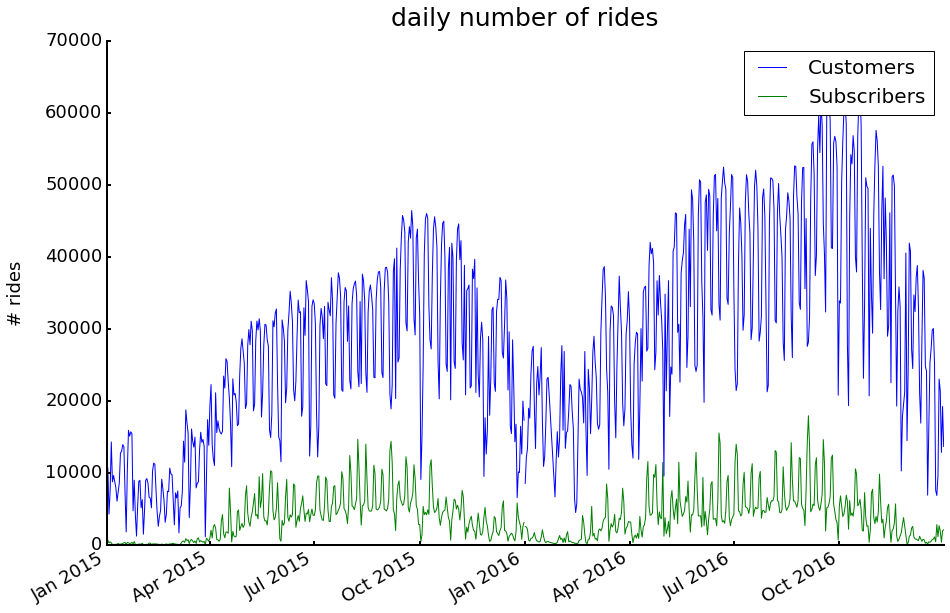

In [4]:
data_list = ['daily_totals_customer_2015.csv',
            'daily_totals_subscriber_2015.csv',
            'daily_totals_customer_2016.csv',
            'daily_totals_subscriber_2016.csv',
            ]
col_list = ['g-','b-','g-','b-']
fig, ax = plt.subplots(figsize=(15, 10))
for idx,data in enumerate(data_list):
    df = pd.read_csv(os.path.join(data_dir,data))
    # convert year and month to datetime object
    df['date'] = df['yr'].apply(str) + '-' + df['mth'].apply(str) + '-' + df['day'].apply(str)    
    df['date'] = df['date'].apply(pd.to_datetime)
    plt.plot(df['date'],df['n_rides'],col_list[idx])


# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# plt.title('fig.autofmt_xdate fixes the labels')
# ax.fill_between(dates, 0, trips, facecolor='green', alpha=0.5)
# plt.xlabel('Date', fontsize=18)
plt.ylabel('# rides', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('daily number of rides', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

blue_line = mlines.Line2D([], [], color='blue', label='Customers')
green_line = mlines.Line2D([], [], color='green', label='Subscribers')

# plt.legend(handles=[blue_line])

ax.legend(prop={'size': 20},handles=[blue_line,green_line])




## Sales vs. rides

Check how the monthly sales in casual passes correlate to monthly casual rides. Because the short-term data do not provide sales data but rides data instead, a strong correlation would allow rides data to be used as a proxy for short-term sales performance.

In [5]:
df_rides = pd.read_csv(os.path.join(data_dir,'monthly_totals_customers.csv'))
# convert year and month to datetime object
df_rides['date'] = df_rides['yr'].apply(str) + '-' + df_rides['mth'].apply(str)
df_rides['date'] = df_rides['date'].apply(pd.to_datetime)
df_rides.head()

,yr,mth,n_rides,date
0,2013,7,174915,2013-07-01
1,2013,8,186056,2013-08-01
2,2013,9,145169,2013-09-01
3,2013,10,97446,2013-10-01
4,2013,11,43973,2013-11-01


In [6]:
df_sales = pd.read_csv(os.path.join(data_dir,'citibike_sales.csv'))
# convert year and month to datetime object
df_sales['date'] = df_sales['year'].apply(str) + '-' + df_sales['month'].apply(str)
df_sales['date'] = df_sales['date'].apply(pd.to_datetime)
df_sales.head()

,year,month,yearly,weekly,three_day,daily,casual,active_annual_members,date
0,2013,6,26515,8044,0,67794,75838,52130,2013-06-01
1,2013,7,14185,5980,0,49021,55001,66315,2013-07-01
2,2013,8,10823,5244,0,51637,56881,77138,2013-08-01
3,2013,9,8103,4634,0,52045,56679,85241,2013-09-01
4,2013,10,7901,3386,0,34234,37620,93124,2013-10-01


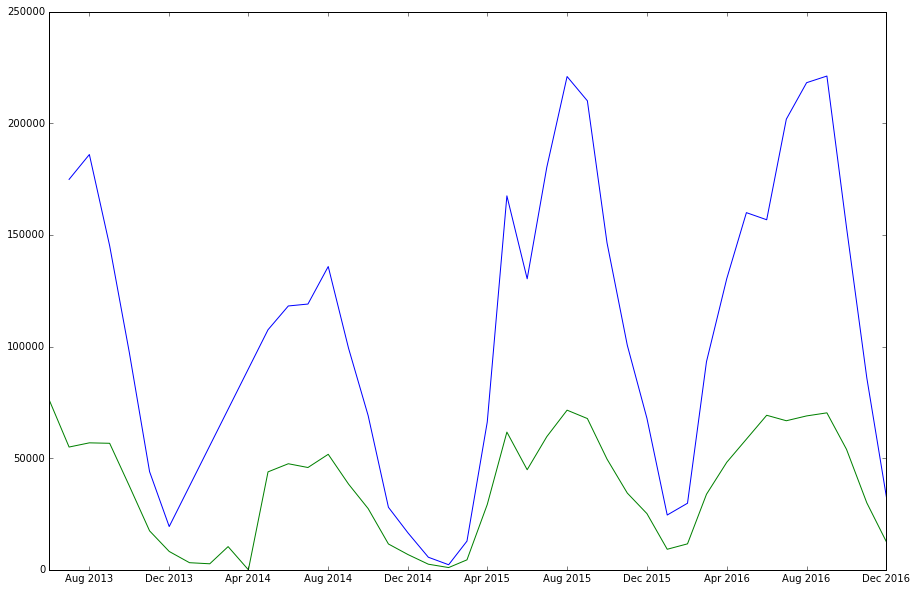

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
# plt.plot(dates,daily,'g-', alpha=1,lw=5, label='Daily')
# plt.plot(dates,three_day,'r-', alpha=1,lw=5, label='3-Day')
# plt.plot(dates,weekly,'b-', alpha=1,lw=5, label='Weekly')
# plt.plot(dates,casual,'k-', alpha=1,lw=5, label='Casual')

plt.plot(df_rides['date'],df_rides['n_rides'])
plt.plot(df_sales['date'],df_sales['casual'])

In [8]:
dates = df_rides['date'][df_rides['yr'] >= 2015].tolist()
rides = df_rides['n_rides'][df_rides['yr'] >= 2015].tolist()
sales = df_sales['casual'][df_sales['year'] >= 2015].tolist()
print(len(dates))
print(len(rides))
print(len(sales))
ratio = [x/y for x,y in zip(rides,sales)]


24
24
24


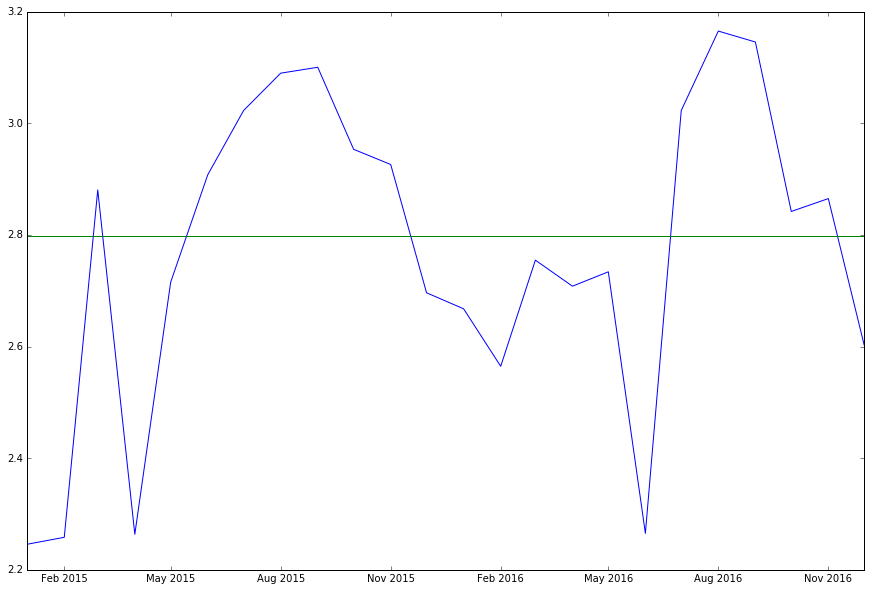

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(dates,ratio)
plt.plot([dates[0],dates[-1]],[np.median(ratio),np.median(ratio)])